<a href="https://colab.research.google.com/github/kdm1258/self_studying_ML_DL/blob/main/9_3_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM(Long Short-Term Memory)와 GRU(Gated Recurrent Unit)는 RNN(Recurrent Neural Network)의 확장 형태이다. 이들은 장기 의존성(long-term dependencies)을 처리하기 위해 고안된 구조이다.

# LSTM(Long Short-Term Memory)
LSTM은 셀 상태(cell state)와 게이트(gate)를 통해 정보의 흐름을 제어한다. 이를 통해 중요한 정보를 오랫동안 유지하고, 불필요한 정보를 제거할 수 있다.

구성 요소:

- 입력 게이트(Input Gate): 현재 입력이 셀 상태에 얼마나 반영될지 결정.

- 포겟 게이트(Forget Gate): 이전 셀 상태 중 얼마나 잊을지를 결정.

- 출력 게이트(Output Gate): 현재 상태를 기반으로 출력값을 생성.

특징:

- 긴 시퀀스 데이터를 학습할 때 유리.

- 계산이 복잡하여 훈련 속도가 다소 느릴 수 있음.



In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [7]:
from threading import active_count
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim = 500, output_dim = 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
import numpy as np

dummy_input = np.zeros((1, 100))  # (batch_size=1, sequence_length=100)
model(dummy_input)  # 임의의 입력 데이터를 한 번 통과시켜서 모델을 빌드
model.summary()  # 정상 출력됨


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (1, 100, 16)                │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (1, 8)                      │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 1)                      │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

SimpleRNN 클래스의 모델 파라미터 개수는 200개였고, LSTM 셀에는 작은 셀이 4개 있으므로 정확히 4배인 800개의 모델 파라미터가 존재한다.

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath='best-lstm-model.h5' ,save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=3)
history = model.fit(train_seq, train_target, batch_size=64, epochs=100, validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5311 - loss: 0.6922

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5313 - loss: 0.6922 - val_accuracy: 0.5866 - val_loss: 0.6898
Epoch 2/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5969 - loss: 0.6886

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5971 - loss: 0.6886 - val_accuracy: 0.6306 - val_loss: 0.6831
Epoch 3/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6399 - loss: 0.6790

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6400 - loss: 0.6789 - val_accuracy: 0.6618 - val_loss: 0.6635
Epoch 4/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6896 - loss: 0.6461

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6897 - loss: 0.6459 - val_accuracy: 0.7250 - val_loss: 0.5810
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7323 - loss: 0.5649

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7323 - loss: 0.5649 - val_accuracy: 0.7276 - val_loss: 0.5565
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7497 - loss: 0.5382 - val_accuracy: 0.7080 - val_loss: 0.5715
Epoch 7/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7591 - loss: 0.5151

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7593 - loss: 0.5150 - val_accuracy: 0.7686 - val_loss: 0.5076
Epoch 8/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7803 - loss: 0.4913

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7803 - loss: 0.4913 - val_accuracy: 0.7700 - val_loss: 0.4991
Epoch 9/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7825 - loss: 0.4833

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7826 - loss: 0.4832 - val_accuracy: 0.7808 - val_loss: 0.4792
Epoch 10/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7935 - loss: 0.4681

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7935 - loss: 0.4681 - val_accuracy: 0.7862 - val_loss: 0.4700
Epoch 11/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7934 - loss: 0.4603

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7934 - loss: 0.4602 - val_accuracy: 0.7864 - val_loss: 0.4649
Epoch 12/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7969 - loss: 0.4516

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7969 - loss: 0.4516 - val_accuracy: 0.7858 - val_loss: 0.4603
Epoch 13/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8026 - loss: 0.4441

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8026 - loss: 0.4441 - val_accuracy: 0.7920 - val_loss: 0.4534
Epoch 14/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8020 - loss: 0.4418

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8020 - loss: 0.4417 - val_accuracy: 0.7920 - val_loss: 0.4510
Epoch 15/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8031 - loss: 0.4382 - val_accuracy: 0.7940 - val_loss: 0.4513
Epoch 16/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8122 - loss: 0.4252

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8121 - loss: 0.4253 - val_accuracy: 0.7964 - val_loss: 0.4462
Epoch 17/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8063 - loss: 0.4309 - val_accuracy: 0.7776 - val_loss: 0.4658
Epoch 18/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8099 - loss: 0.4262

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8099 - loss: 0.4262 - val_accuracy: 0.7964 - val_loss: 0.4435
Epoch 19/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8069 - loss: 0.4293 - val_accuracy: 0.7924 - val_loss: 0.4546
Epoch 20/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8122 - loss: 0.4191 - val_accuracy: 0.7906 - val_loss: 0.4526
Epoch 21/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8107 - loss: 0.4186

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8107 - loss: 0.4187 - val_accuracy: 0.7950 - val_loss: 0.4390
Epoch 22/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8110 - loss: 0.4237

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8111 - loss: 0.4236 - val_accuracy: 0.7978 - val_loss: 0.4382
Epoch 23/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8113 - loss: 0.4178 - val_accuracy: 0.7976 - val_loss: 0.4453
Epoch 24/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8106 - loss: 0.4215

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8106 - loss: 0.4214 - val_accuracy: 0.7986 - val_loss: 0.4367
Epoch 25/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8120 - loss: 0.4147

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8120 - loss: 0.4147 - val_accuracy: 0.7982 - val_loss: 0.4342
Epoch 26/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8141 - loss: 0.4177

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8141 - loss: 0.4177 - val_accuracy: 0.7988 - val_loss: 0.4335
Epoch 27/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8208 - loss: 0.4020

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8208 - loss: 0.4021 - val_accuracy: 0.7964 - val_loss: 0.4333
Epoch 28/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8148 - loss: 0.4098 - val_accuracy: 0.7954 - val_loss: 0.4354
Epoch 29/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8194 - loss: 0.4079 - val_accuracy: 0.7898 - val_loss: 0.4405
Epoch 30/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8131 - loss: 0.4109 - val_accuracy: 0.7952 - val_loss: 0.4333


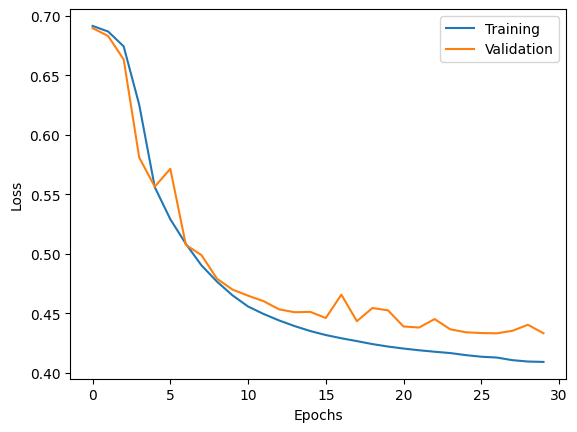

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

# Drop out 적용

드롭아웃은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법

SimpleRNN과 LSTM 클래스 모두 dropout과 recurrent_dropout 매개변수를 가지고 있다.

dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉상태에 dropout을 적용한다.

그러나 기술적인문제로 recurrent_dropout을 적용하면 GPU를 사용하여 모델을 훈련하지 못하므로 여기서는 dropout만을 사용하겠다.

In [16]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath='best-dropout-model.h5' ,save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=3)
history = model2.fit(train_seq, train_target, batch_size=64, epochs=100, validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5135 - loss: 0.6930

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5137 - loss: 0.6930 - val_accuracy: 0.5580 - val_loss: 0.6923
Epoch 2/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5676 - loss: 0.6920

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5676 - loss: 0.6920 - val_accuracy: 0.5876 - val_loss: 0.6912
Epoch 3/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5932 - loss: 0.6906

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5932 - loss: 0.6906 - val_accuracy: 0.6042 - val_loss: 0.6889
Epoch 4/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6108 - loss: 0.6879

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6109 - loss: 0.6879 - val_accuracy: 0.6196 - val_loss: 0.6847
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6304 - loss: 0.6811

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6304 - loss: 0.6811 - val_accuracy: 0.6260 - val_loss: 0.6705
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6428 - loss: 0.6582

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6429 - loss: 0.6581 - val_accuracy: 0.6874 - val_loss: 0.6324
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7000 - loss: 0.6221

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7000 - loss: 0.6221 - val_accuracy: 0.7174 - val_loss: 0.6079
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7259 - loss: 0.5984

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7260 - loss: 0.5984 - val_accuracy: 0.7358 - val_loss: 0.5862
Epoch 9/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7429 - loss: 0.5783

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7429 - loss: 0.5782 - val_accuracy: 0.7364 - val_loss: 0.5689
Epoch 10/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7556 - loss: 0.5558

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7556 - loss: 0.5558 - val_accuracy: 0.7506 - val_loss: 0.5546
Epoch 11/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7611 - loss: 0.5400

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7611 - loss: 0.5400 - val_accuracy: 0.7566 - val_loss: 0.5369
Epoch 12/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7719 - loss: 0.5215

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7718 - loss: 0.5215 - val_accuracy: 0.7568 - val_loss: 0.5256
Epoch 13/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7778 - loss: 0.5088

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7777 - loss: 0.5088 - val_accuracy: 0.7602 - val_loss: 0.5158
Epoch 14/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7805 - loss: 0.4993

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7804 - loss: 0.4993 - val_accuracy: 0.7700 - val_loss: 0.5102
Epoch 15/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7793 - loss: 0.4901

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7794 - loss: 0.4901 - val_accuracy: 0.7744 - val_loss: 0.4957
Epoch 16/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7834 - loss: 0.4826

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7835 - loss: 0.4825 - val_accuracy: 0.7746 - val_loss: 0.4901
Epoch 17/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7922 - loss: 0.4751 - val_accuracy: 0.7766 - val_loss: 0.4917
Epoch 18/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7916 - loss: 0.4700

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7916 - loss: 0.4699 - val_accuracy: 0.7772 - val_loss: 0.4828
Epoch 19/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7919 - loss: 0.4664

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7919 - loss: 0.4663 - val_accuracy: 0.7804 - val_loss: 0.4771
Epoch 20/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7906 - loss: 0.4628

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7906 - loss: 0.4627 - val_accuracy: 0.7856 - val_loss: 0.4711
Epoch 21/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7986 - loss: 0.4536

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7985 - loss: 0.4537 - val_accuracy: 0.7858 - val_loss: 0.4697
Epoch 22/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7979 - loss: 0.4541 - val_accuracy: 0.7770 - val_loss: 0.4729
Epoch 23/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8047 - loss: 0.4424

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8046 - loss: 0.4425 - val_accuracy: 0.7866 - val_loss: 0.4665
Epoch 24/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8010 - loss: 0.4442

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8010 - loss: 0.4442 - val_accuracy: 0.7878 - val_loss: 0.4615
Epoch 25/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8031 - loss: 0.4423 - val_accuracy: 0.7856 - val_loss: 0.4625
Epoch 26/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8069 - loss: 0.4353

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8068 - loss: 0.4353 - val_accuracy: 0.7848 - val_loss: 0.4595
Epoch 27/100
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8092 - loss: 0.4305

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8092 - loss: 0.4307 - val_accuracy: 0.7900 - val_loss: 0.4547
Epoch 28/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8073 - loss: 0.4331

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8073 - loss: 0.4331 - val_accuracy: 0.7918 - val_loss: 0.4539
Epoch 29/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8037 - loss: 0.4369

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8038 - loss: 0.4369 - val_accuracy: 0.7950 - val_loss: 0.4508
Epoch 30/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8144 - loss: 0.4277

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8144 - loss: 0.4277 - val_accuracy: 0.7890 - val_loss: 0.4502
Epoch 31/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8121 - loss: 0.4238 - val_accuracy: 0.7876 - val_loss: 0.4544
Epoch 32/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8106 - loss: 0.4259

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8106 - loss: 0.4259 - val_accuracy: 0.7942 - val_loss: 0.4437
Epoch 33/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8061 - loss: 0.4306 - val_accuracy: 0.7934 - val_loss: 0.4442
Epoch 34/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8172 - loss: 0.4200

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8172 - loss: 0.4200 - val_accuracy: 0.7956 - val_loss: 0.4429
Epoch 35/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8076 - loss: 0.4251

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8077 - loss: 0.4250 - val_accuracy: 0.7934 - val_loss: 0.4424
Epoch 36/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8154 - loss: 0.4172 - val_accuracy: 0.7966 - val_loss: 0.4427
Epoch 37/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8131 - loss: 0.4196 - val_accuracy: 0.7898 - val_loss: 0.4463
Epoch 38/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8130 - loss: 0.4211 - val_accuracy: 0.7932 - val_loss: 0.4495


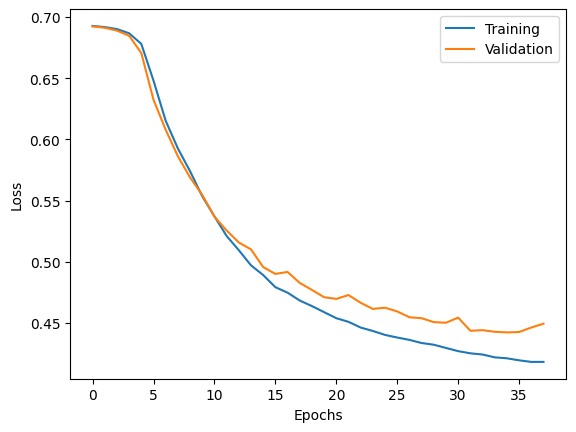

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

# 2개의 층 연결하기

RNN에서 주의할 점:

순환층의 은닉상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달한다. 하지만 순환층을 쌓게 되면 모든 순환 층에 순차 데이터가 필요하다. 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를출력해야한다.

In [19]:
# return_sequences 매개변수를 True로 지정하여 앞선 순환층이 모든 타임스텝에 대한 은닉 상태를 출력하게 한다.
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
dummy_input = np.zeros((1,100))
model3(dummy_input)
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (1, 100, 16)                │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (1, 100, 8)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (1, 8)                      │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 1)                      │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

첫번째 LSTM층은 모든 타임스텝에 대해 은닉상태를 출력하므로 (None, 100, 8)의 차원을 가진다.

두번째 LSTM층은 마지막 타임스텝에 정보를 압축하여 은닉상태를 출력하므로 (None, 8)의 차원을 가진다.

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, batch_size = 64, epochs=100, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5014 - loss: 0.6930

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5017 - loss: 0.6930 - val_accuracy: 0.5216 - val_loss: 0.6926
Epoch 2/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5485 - loss: 0.6921

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5486 - loss: 0.6921 - val_accuracy: 0.5734 - val_loss: 0.6904
Epoch 3/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5922 - loss: 0.6886

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5924 - loss: 0.6885 - val_accuracy: 0.6270 - val_loss: 0.6810
Epoch 4/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6448 - loss: 0.6712

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6450 - loss: 0.6710 - val_accuracy: 0.6848 - val_loss: 0.6184
Epoch 5/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6958 - loss: 0.5984

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6959 - loss: 0.5982 - val_accuracy: 0.7166 - val_loss: 0.5661
Epoch 6/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7314 - loss: 0.5496

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7315 - loss: 0.5496 - val_accuracy: 0.7392 - val_loss: 0.5333
Epoch 7/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7526 - loss: 0.5198

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7526 - loss: 0.5197 - val_accuracy: 0.7614 - val_loss: 0.5049
Epoch 8/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7608 - loss: 0.5029

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7608 - loss: 0.5028 - val_accuracy: 0.7614 - val_loss: 0.5017
Epoch 9/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.4895

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7735 - loss: 0.4894 - val_accuracy: 0.7742 - val_loss: 0.4848
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7765 - loss: 0.4838

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7765 - loss: 0.4837 - val_accuracy: 0.7758 - val_loss: 0.4818
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7845 - loss: 0.4732 - val_accuracy: 0.7726 - val_loss: 0.4828
Epoch 12/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7868 - loss: 0.4604

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7868 - loss: 0.4604 - val_accuracy: 0.7822 - val_loss: 0.4737
Epoch 13/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7946 - loss: 0.4518

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7946 - loss: 0.4518 - val_accuracy: 0.7832 - val_loss: 0.4711
Epoch 14/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7963 - loss: 0.4517 - val_accuracy: 0.7806 - val_loss: 0.4715
Epoch 15/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7891 - loss: 0.4571

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7891 - loss: 0.4570 - val_accuracy: 0.7836 - val_loss: 0.4661
Epoch 16/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7964 - loss: 0.4499

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7964 - loss: 0.4499 - val_accuracy: 0.7848 - val_loss: 0.4636
Epoch 17/100
310/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8019 - loss: 0.4435

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8018 - loss: 0.4436 - val_accuracy: 0.7846 - val_loss: 0.4633
Epoch 18/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7958 - loss: 0.4548 - val_accuracy: 0.7806 - val_loss: 0.4720
Epoch 19/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8036 - loss: 0.4406

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8036 - loss: 0.4406 - val_accuracy: 0.7898 - val_loss: 0.4631
Epoch 20/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8020 - loss: 0.4451 - val_accuracy: 0.7834 - val_loss: 0.4706
Epoch 21/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8001 - loss: 0.4419

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8002 - loss: 0.4419 - val_accuracy: 0.7886 - val_loss: 0.4584
Epoch 22/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7982 - loss: 0.4443 - val_accuracy: 0.7866 - val_loss: 0.4600
Epoch 23/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8011 - loss: 0.4429 - val_accuracy: 0.7850 - val_loss: 0.4611
Epoch 24/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8074 - loss: 0.4388

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8074 - loss: 0.4388 - val_accuracy: 0.7896 - val_loss: 0.4543
Epoch 25/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8026 - loss: 0.4376

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8026 - loss: 0.4376 - val_accuracy: 0.7948 - val_loss: 0.4505
Epoch 26/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8061 - loss: 0.4317 - val_accuracy: 0.7908 - val_loss: 0.4545
Epoch 27/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8068 - loss: 0.4333

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8068 - loss: 0.4334 - val_accuracy: 0.7876 - val_loss: 0.4505
Epoch 28/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8125 - loss: 0.4305 - val_accuracy: 0.7886 - val_loss: 0.4556
Epoch 29/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8077 - loss: 0.4319

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8077 - loss: 0.4320 - val_accuracy: 0.7950 - val_loss: 0.4489
Epoch 30/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8103 - loss: 0.4296 - val_accuracy: 0.7956 - val_loss: 0.4539
Epoch 31/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8078 - loss: 0.4313 - val_accuracy: 0.7888 - val_loss: 0.4573
Epoch 32/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8091 - loss: 0.4259 - val_accuracy: 0.7914 - val_loss: 0.4525


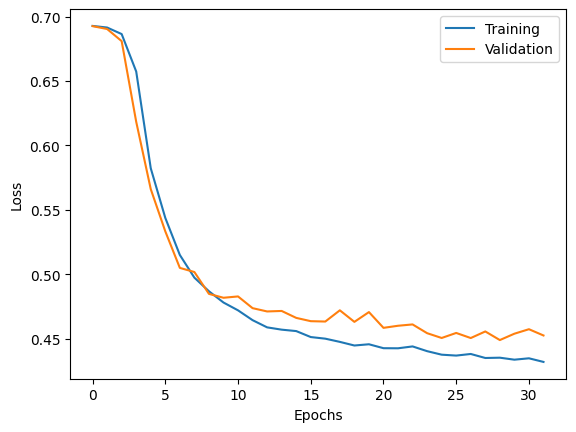

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

# GRU(Gated Recurrent Unit) 구조
GRU는 LSTM을 단순화한 구조이다. 업데이트 게이트(Update Gate)와 리셋 게이트(Reset Gate)를 사용한다. LSTM보다 계산 효율성이 높다.

구성 요소:

- 업데이트 게이트(Update Gate): 이전 상태를 유지할지를 결정한다.

- 리셋 게이트(Reset Gate): 과거 정보를 무시할지를 결정한다.

특징:

- 간단한 구조로 인해 훈련이 빠르다.

- 적은 데이터에서도 좋은 성능을 보인다.


In [26]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
model4(dummy_input)
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (1, 100, 16)                │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (1, 8)                      │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (1, 1)                      │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

GRU 셀에는 3개의 작은 셀이 있고 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.

입력에 곱하는 가중치는 16 * 8 = 128개이고 은닉 상태에 곱하는 가중치는 8 * 8 = 64개이다.

절편은 뉴런마다 하나씩이므로 8개이다.

128+64+8 = 200

이때 GRU는 3개의 작은 셀을 가지므로 200*3 = 600

그런데 여기서 GRU의 파라미터는 624개라고한다. 무엇이 문제일까?

텐서플로에서 구현된 GRU는 은닉상태에 곱해지는 절편이 별도로 필요해 작은 셀마다 하나씩 절편이 추가되고, 8개의 뉴런이 있으므로 총 24개의 모델 파라미터가 더해진다.

In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5158 - loss: 0.6926

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5159 - loss: 0.6926 - val_accuracy: 0.5518 - val_loss: 0.6910
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5687 - loss: 0.6899

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5687 - loss: 0.6899 - val_accuracy: 0.5790 - val_loss: 0.6880
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5913 - loss: 0.6864

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5913 - loss: 0.6864 - val_accuracy: 0.5984 - val_loss: 0.6830
Epoch 4/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6063 - loss: 0.6808

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6063 - loss: 0.6808 - val_accuracy: 0.6116 - val_loss: 0.6746
Epoch 5/100
308/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6218 - loss: 0.6704

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6219 - loss: 0.6703 - val_accuracy: 0.6358 - val_loss: 0.6604
Epoch 6/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6561 - loss: 0.6515

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6561 - loss: 0.6514 - val_accuracy: 0.6586 - val_loss: 0.6362
Epoch 7/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6847 - loss: 0.6190

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6848 - loss: 0.6188 - val_accuracy: 0.7064 - val_loss: 0.5830
Epoch 8/100
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7229 - loss: 0.5533

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7230 - loss: 0.5531 - val_accuracy: 0.7522 - val_loss: 0.5091
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7597 - loss: 0.5020

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7597 - loss: 0.5020 - val_accuracy: 0.7654 - val_loss: 0.4895
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7720 - loss: 0.4839

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7720 - loss: 0.4839 - val_accuracy: 0.7752 - val_loss: 0.4754
Epoch 11/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7835 - loss: 0.4670

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7836 - loss: 0.4669 - val_accuracy: 0.7788 - val_loss: 0.4695
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7918 - loss: 0.4536 - val_accuracy: 0.7734 - val_loss: 0.4844
Epoch 13/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8009 - loss: 0.4413

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8009 - loss: 0.4414 - val_accuracy: 0.7860 - val_loss: 0.4625
Epoch 14/100
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8045 - loss: 0.4396

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8044 - loss: 0.4397 - val_accuracy: 0.7854 - val_loss: 0.4591
Epoch 15/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8021 - loss: 0.4409 - val_accuracy: 0.7760 - val_loss: 0.4677
Epoch 16/100
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8002 - loss: 0.4414

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8002 - loss: 0.4414 - val_accuracy: 0.7860 - val_loss: 0.4588
Epoch 17/100
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8049 - loss: 0.4365

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8049 - loss: 0.4365 - val_accuracy: 0.7950 - val_loss: 0.4473
Epoch 18/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8073 - loss: 0.4321 - val_accuracy: 0.7860 - val_loss: 0.4637
Epoch 19/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8088 - loss: 0.4246 - val_accuracy: 0.7892 - val_loss: 0.4506
Epoch 20/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8128 - loss: 0.4244 - val_accuracy: 0.7906 - val_loss: 0.4487


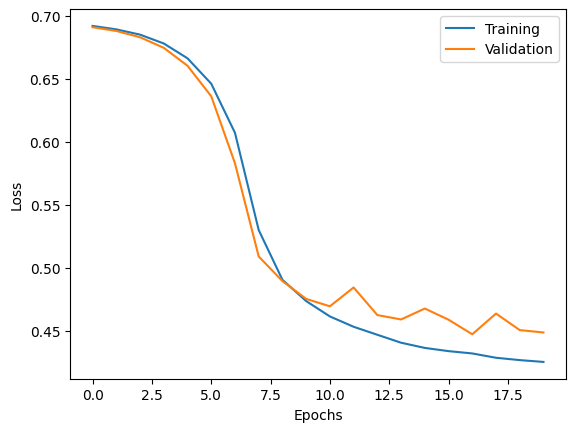

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()